Author: Julia Wervers
Student Number: 13168665

This is the main script for the final project of the data processing course. The objective of this project is to find how representative lists of keywords extracted from summaries are of the books temselves. This question is evaluated by getting a list of keywords from both the actual book and it's summary, and by then calculating how similar these lists of keywords are.

In [39]:
#Imports
import spacy
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np

# Load a large nlp pipeline with vectors
nlp = spacy.load("en_core_web_lg")
#Increase maximum allowed number of characters per document
nlp.max_length = 1500000

In [35]:
###Functions

#Function to get wordlist of a textfile
def get_book_wordlist(textfile):
    '''
    This function loads text from a textfile, and turns it into a clean list of words by taking the lemma of each word present in
    text, by removing stopwords and puncuation, and by removing any extra whitespaces and newlines. 
    '''
    #Get text 
    f = open(f'data/{textfile}', "r", encoding="utf8")
    text = f.read()
    #Close document once loading is done
    f.close()

    #Process the input text using the spaCy language model
    doc = nlp(text)
    #Iterate through the tokens and get the lowercase lemma of each token if the token is not a stopword and is not punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    #Clean up the extracted text
    processed_text = " ".join(lemmas).strip()
    #Split the text up using space into a list of words
    wordlist = processed_text.split()
                      
    return(wordlist)

#Function to get the term frequency of a list of words
def get_term_frequency(wordlist):
    '''
    This function calculates the term frequency for each word included in the input wordlist.
    '''
    #Count how often each word occurs in the wordlist
    word_frequency = Counter(wordlist)
    
    #Get the total amount of unique words
    total_words = len(word_frequency)
    
    #Calculate the term frequency and save it in a dictionary with it's corresponding term
    term_frequency = {term: count / total_words for term, count in word_frequency.items()}
    
    return(term_frequency)

#Function to get a list of the n words with the highest term frequency inverse document frequency per document in document list
def get_tfidf(document_list, n=25):
    '''
    This function calculates the term frequency for each word in each document in the input document list. Then the function 
    calculates the inverse document frequency each word in each document in the input document list. This information is then used
    to calculate the full tf-idf score for each word per document, whereafter the 25 words with the highest tf-idf scores are saved
    per docuemnt.
    '''
    
    #Create empty lists
    total_words = []
    term_frequency_list = []
    
    #Loop through each document to get the wordlist and time frequency per document
    for document in document_list:
        wordlist = get_book_wordlist(document)
        total_words.append(wordlist)
        term_frequency = get_term_frequency(wordlist)
        term_frequency_list.append(term_frequency)

    #Create a list of all unique words in the documents
    all_words = set([word for sublist in total_words for word in sublist])

    #Get the document frequency for each of the unique words
    document_frequency = {word: sum(1 for sublist in total_words if word in sublist) for word in all_words}

    #Calculate Inverse Document Frequency for each word
    amount_documents = len(books)
    inverse_document_frequency = {word: math.log(amount_documents / document_frequency[word]) for word in document_frequency}

    #Create empty list
    tfidf_list = []
    
    #Loop through the documents to calculate the tfidf scores and save the 25 words with the highest scores per document
    for document in term_frequency_list:
        #Calculate the tfidf per word
        tfidf = {word: term_frequency * inverse_document_frequency[word] for word, term_frequency in document.items()}
        #Sort the dictionary of tfidf scores
        tfidf = dict(sorted(tfidf.items(), key=lambda word: word[1], reverse=True))
        #Turn the words to a list and select the 25 words with the highest tfidf scores
        tfidf_list.append(list(tfidf.keys())[:n])
        
    return(tfidf_list)

In [36]:
#MAIN CODE

#Create a list of book filenames
books = ["Carmilla.txt", "Crime_and_Punishment.txt", "Frankenstein.txt", "Dracula.txt", "The_Fall_of_the_House_of_Usher.txt",
         "The_Great_Gatsby.txt", "The_Metamorphosis.txt", "The_Picture_of_Dorian_Gray.txt", "The_Yellow_Wallpaper.txt", "Wuthering_Heights.txt"]

#Create a list of summary filenames
summaries = ["Carmilla_summary.txt", "Crime_and_Punishment_summary.txt", "Frankenstein_summary.txt", "Dracula_summary.txt", 
             "The_Fall_of_the_House_of_Usher_summary.txt", "The_Great_Gatsby_summary.txt", "The_Metamorphosis_summary.txt", 
             "The_Picture_of_Dorian_Gray_summary.txt", "The_Yellow_Wallpaper_summary.txt", "Wuthering_Heights_summary.txt"]

#Get the 25 keywords with the hightest tf-idf scores for each document
key_words_books = get_tfidf(books, n = 100)
key_words_summaries = get_tfidf(summaries)

#Create empty dictionary
similarity_percentages = {}

#Calculate the percentage of shared words between the book keywords and the summary keywords
for i in range(len(key_words_books)):
    #Get the shared words between the book and summary keywords
    shared_key_words = set(key_words_books[i]).intersection(set(key_words_summaries[i]))
    
    #Calculate the similarity percentage and save the results
    similarity_percentage = len(shared_key_words)/len(key_words_summaries[i]) * 100
    similarity_percentages[books[i]] = similarity_percentage

#Print the final similarity percentages
print('The similarity percentages for each book are:', similarity_percentages)

The similarity percentages for each book are: {'Carmilla.txt': 24.0, 'Crime_and_Punishment.txt': 12.0, 'Frankenstein.txt': 16.0, 'Dracula.txt': 36.0, 'The_Fall_of_the_House_of_Usher.txt': 12.0, 'The_Great_Gatsby.txt': 16.0, 'The_Metamorphosis.txt': 12.0, 'The_Picture_of_Dorian_Gray.txt': 12.0, 'The_Yellow_Wallpaper.txt': 12.0, 'Wuthering_Heights.txt': 40.0}


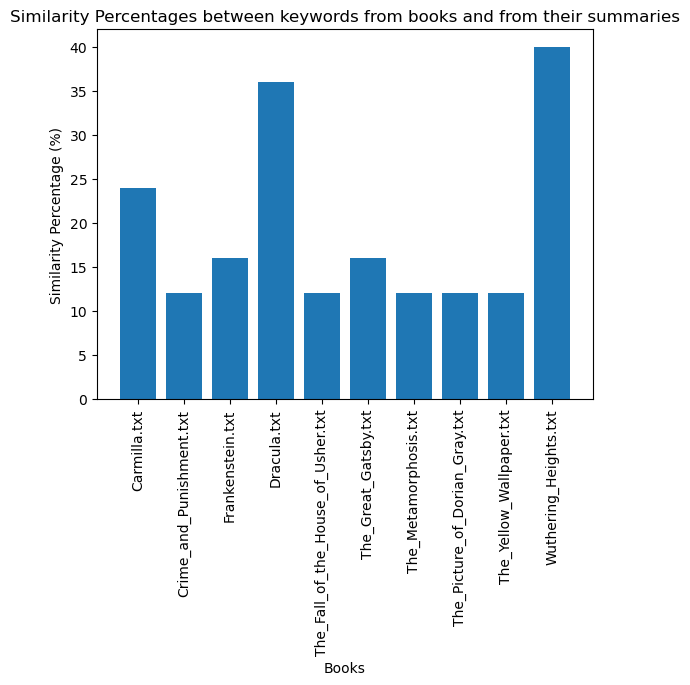

In [37]:
#Plot the results

plt.bar(x = similarity_percentages.keys(), height = similarity_percentages.values())
plt.title("Similarity Percentages between keywords from books and from their summaries")
plt.ylabel("Similarity Percentage (%)")
plt.xlabel("Books")
#Rotate xticks to increase readability
plt.xticks(rotation= 90)
plt.show()

In [41]:
#Calculate average similarity percentage
average_similarity = np.mean(list(similarity_percentages.values()))

#Print final result
print(f'On average book summaries are {average_similarity}% representative of their books.')

On average book summaries are 19.2% representative of their books.
